# 4.9 Creating charts and graphs in Python

### This script contains the following points:

#### 1. Create and export a bar chart
#### 2. Create a scatterplot
#### 3. Create and export histograms
#### 4. Create and export lineplots

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Path import

path = r'/Users/nekow/Documents/Instacart Basket Analysis'

In [3]:
# Importing pickle file

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_flagged.pkl'))

## 1. Create and export a bar chart

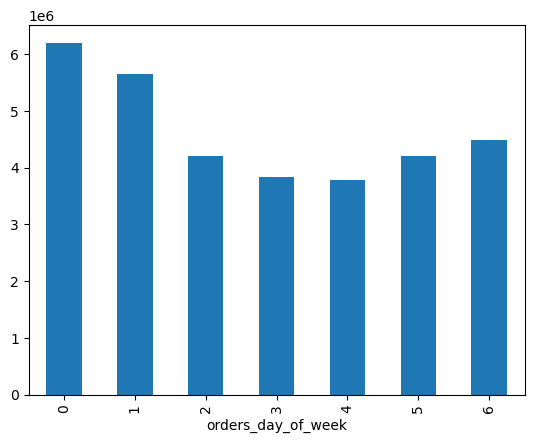

In [4]:
# Creating a bar chart and sorting it to the index values

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

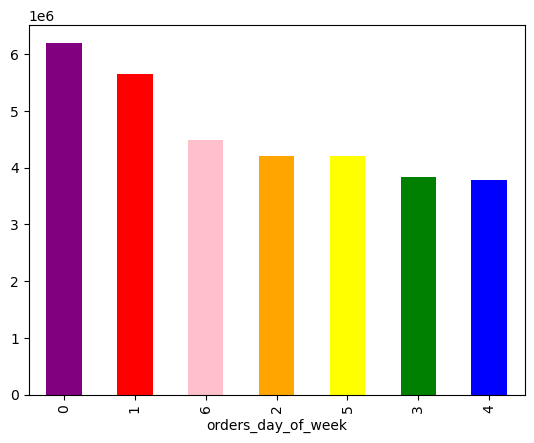

In [5]:
# Adding color to the bar chart

bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [6]:
# Saving the bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

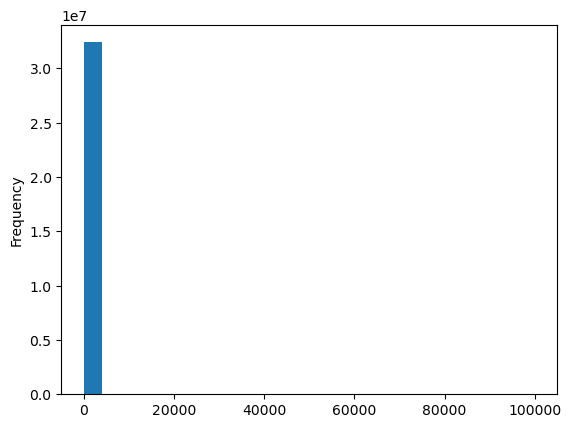

In [7]:
# creating a histogram

ords_prods_merge['prices'].plot.hist(bins = 25)

In [8]:
# data check

ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [9]:
# checking the mean

ords_prods_merge['prices'].mean()

11.980225638383468

In [10]:
# checking the median

ords_prods_merge['prices'].median()

7.4

In [11]:
# checking the max

ords_prods_merge['prices'].max()

99999.0

## 2. Create a scatterplot

/Users/nekow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nekow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prices', ylabel='prices'>

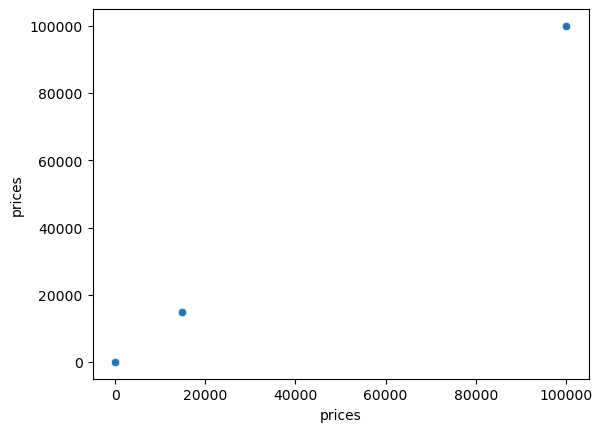

In [12]:
# finding outliers with a scatterplot

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [13]:
# Determining the values

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,_merge,price_range,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_order_frequency,order_frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,prior,12,2,...,both,NaN,Average Days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,prior,22,6,...,both,NaN,Average Days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,prior,2,2,...,both,NaN,Average Days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,prior,3,0,...,both,NaN,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,prior,8,1,...,both,NaN,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,prior,29,0,...,both,NaN,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,prior,31,0,...,both,NaN,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,prior,13,3,...,both,NaN,Slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,prior,7,3,...,both,NaN,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [14]:
# mark the outliers as missing

ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [15]:
# rechecking the data

ords_prods_merge['prices'].max()

25.0

## 3. Create and export histograms

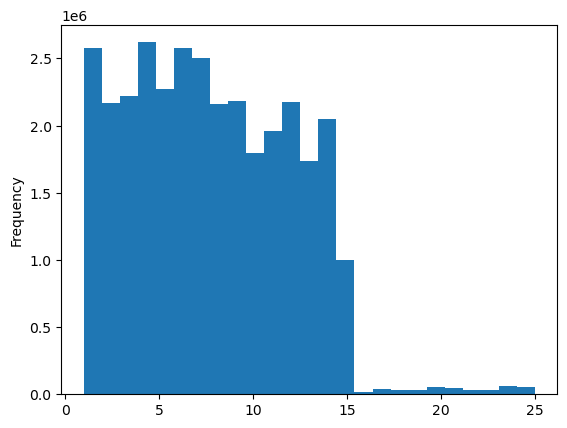

In [16]:
# retrying the histogram

hist = ords_prods_merge['prices'].plot.hist(bins = 25)

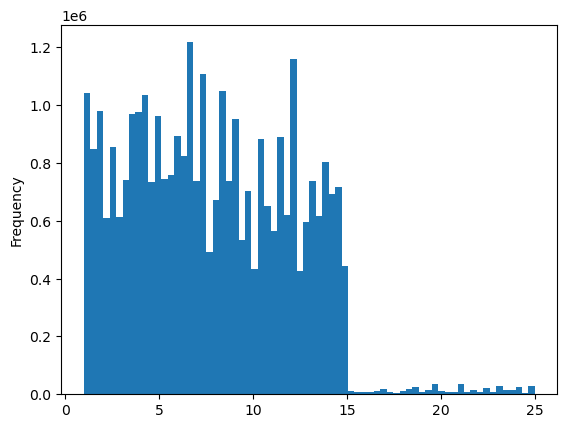

In [17]:
# creating a second histogram

hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [18]:
# saving the first histogram

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

In [19]:
# saving the second histogram

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_2_orders_dow.png'))

In [20]:
# creating a subset

df = ords_prods_merge[:2000000]

## 4. Create and export lineplots

In [21]:
# creating a list holding True/False values to the text nnp.random.rand() <=0.7

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [22]:
# checking the new list

dev

array([False,  True, False, ...,  True,  True,  True])

In [23]:
# viewing the function more clearly

np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [24]:
# Storing 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [25]:
# Storing 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [26]:
# Testing the quantity of the data

len(ords_prods_merge)

32404859

In [27]:
# Testing the quanitity of the new dataframe Big/Small

len(big) + len(small)

32404859

In [28]:
# Pulling only the necessary columns

df_2 = small[['orders_day_of_week','prices']]

/Users/nekow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nekow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nekow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nekow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

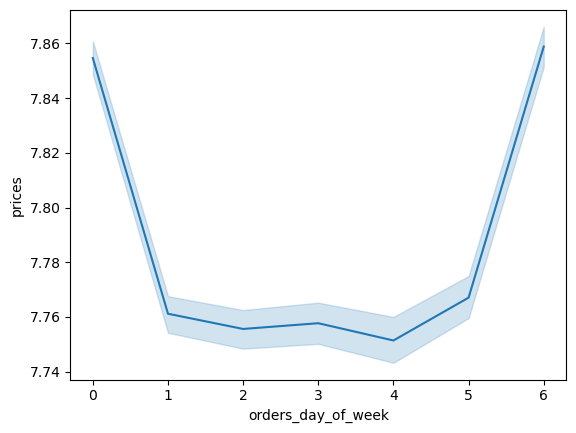

In [29]:
# Creating a new lineplot for the data

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [30]:
# Whole dataframe analysis

df_4 = ords_prods_merge[['orders_day_of_week','prices']]

/Users/nekow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nekow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nekow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nekow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

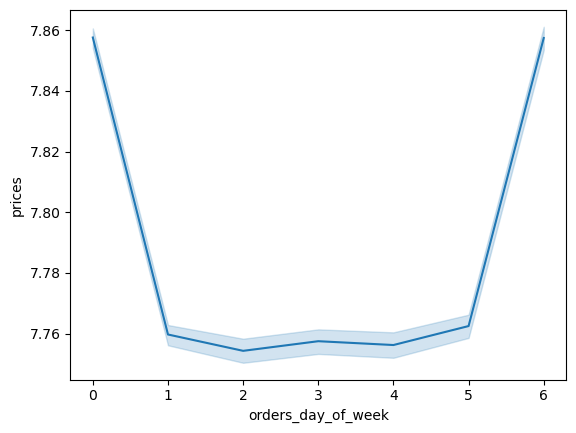

In [31]:
# Creating a lineplot for the whole dataframe

line_2 = sns.lineplot(data = df_4, x = 'orders_day_of_week', y = 'prices')